In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotutils as pu
from sympy import *
%matplotlib inline

We add vectors to get $v + w$. We multiply them by numbers $c$ and $d$ to get $cv$ and $dw$. Combining those two operations (adding $cw$ to $dw$) gives the **linear combination** $cv + dw$.

$$cv + dw = c\begin{bmatrix}1\\1\end{bmatrix} + d\begin{bmatrix}2\\3\end{bmatrix} = \begin{bmatrix}c + 2d\\c + 3d\end{bmatrix}$$

We can also write a column vector *inline* as $w = (2, 3)$ but that is not the same as the row vector $\begin{bmatrix}2 & 3\end{bmatrix}$.

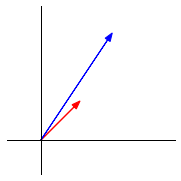

In [15]:
fix, axes = plt.subplots(1, figsize=(3, 3))
pu.setup_axes(axes, xlim=(-1, 4), ylim=(-1, 4))
arrowprops = {'head_length': 0.25, 'head_width': 0.18}
plt.arrow(0, 0, 1, 1, **arrowprops, ec='r', fc='r')
plt.arrow(0, 0, 2, 3, **arrowprops, ec='b', fc='b')

## using sympy
Sympy is a wonderful toolkit for doing symbolic programming. We can also use it to *cheat* and help it solve systems of equations for us. Let's put it to work on one of the problems of the linear algebra book.

Write down the three equations for $c$, $d$ and $e$ so that $cu + dv + ew = b$ and try to find $c$, $d$ and $e$.

$$
u = \begin{bmatrix}2\\-1\\0\end{bmatrix}
v = \begin{bmatrix}-1\\2\\-1\end{bmatrix}
w = \begin{bmatrix}0\\-1\\2\end{bmatrix}
b = \begin{bmatrix}1\\0\\0\end{bmatrix}
$$

The equations are:

$$
\begin{cases}
2c - d &= 1\\
-c + 2d - e &= 0\\
-d + 2e &= 0\\
\end{cases}
$$

And we could try solve them ourselves which is not that hard to do via elimination but alternatively we can also use `sympy`.

In [22]:
s = [S('2*c - d - 1'), S('-c + 2*d - e'), S('-d + 2*e')]
solve(s)

{d: 1/2, c: 3/4, e: 1/4}